### Automating Visum with Python

Travel demand modelling in Visum involves dealing with lots of data and repetitions of same procedures with different alternatives (scenario management). It is time consuming to do everything manually and the probability of commiting mistakes is too significant to ignore. Fortunately, Visum provides the opportunity to interact with it via COM interface with Python. Python scripts can be executed from within or outside Visum and almost every aspect of the modelling processs can be automated with Python. By doing things programmatically lots time can be saved and manual mistakes also can be avoided.

It is a begginer friendly turorial on scripting with python in Visum. But to really get what is happening here, the reader should have the basic understanding of Object Oriented Programming (OOP). In brief, it is a hierarchical approach in programming in which every activity has a method (function) to it. In Visum the structure starts with Visum as shown below. To get the intution of OOP in Visum, imagine that Visum is a parent container. This parent container will have sub containers. For example all the network related objects will be in a container called `Net` which is a part of `Visum`. In OOP dot(.) extenstion is used to access the heirarchical elements.

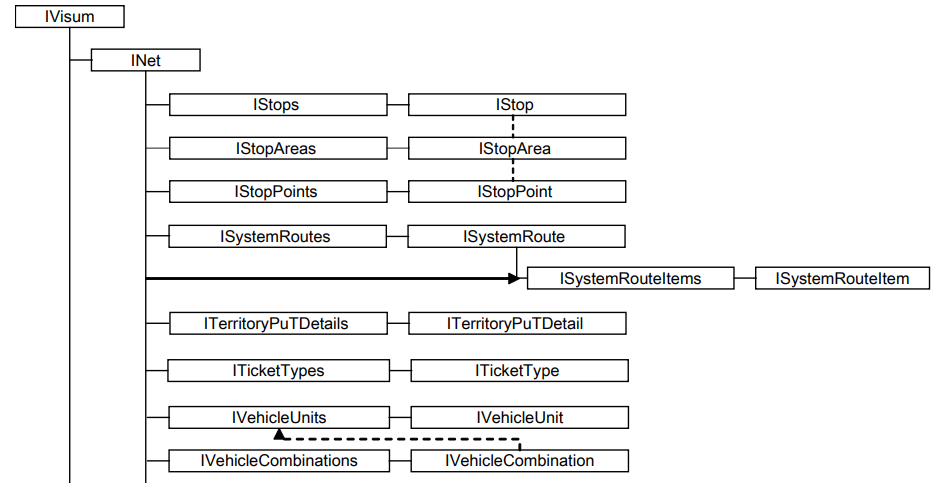

To access anything related to Stops, the syntax looks like this `Visum.Net.Stops`. This line will give access to everything related to Stops and with dot(.) extension after `Stops` different properties of stops can be targeted and customised.

Before doing any coding in Visum you need register the Visum as COM serever. You can do that by clicking help button in Visum and seleting *Register as COM server* option. It may ask for administrator permission.

I will cover the following topics in this tutorial

* <a href = '#instance' style = 'text-decoration:none'>Creating an instance of Visum</a>
* <a href = '#network' style = 'text-decoration:none'>Building Network</a>
    - <a href = '#network1' style = 'text-decoration:none'>By Importing shapefiles</a>
    - <a href = '#network2' style = 'text-decoration:none'>Building from scratch with coordinates</a>
* <a href = '#data' style = 'text-decoration:none'>Uploading Data</a>
* <a href = '#procedures' style = 'text-decoration:none'>Creating and Executing Procedures</a>
* <a href = '#miscellaneous' style = 'text-decoration:none'>Miscellaneous</a>

#### <a id = "instance" style = "color:black">Creating an Instance</a>

In [1]:
import win32com.client as com #to install - pip install pywin32
import pandas as pd
Visum = com.Dispatch("Visum.Visum") #this line will launch the VISUM window

Before doing anything it is good practice to clear everyhting in the network. `ClearNet()` method of Visum can be used for that.

In [2]:
Visum.ClearNet()

In [3]:
#this can be ignored for now
#this function takes the screen shot of the network at the moment and prints it. so that we can see whether the network
#modifications are happening or not
from IPython.display import Image, display
def printNetwork(imageName):
    Visum.Graphic.DisplayEntireNetwork()
    loc = f"C:/Users/pamidiashoka/Desktop/visum/images/{imageName}.png"
    Visum.Graphic.Screenshot(loc, screenResFactor=1)
    display(Image(loc))

### <a id = "network" style = "color:black">Building network</a>
Network can be built in two ways in Visum - by importing files (Shapefiles, OSM or any other format) or from scratch by provding coordinates.
#### <a id = "network1" style = "color:black">Importing shapefiles</a>

`IO` object of `Visum` has all the import and export related methods. To import a shape file we need to call 
`ImportShapefile(FileName, ImportShapefileParameter)` method of `IO`. `ImportShapefile()` method takes two arguments - file path with .shp extention, parameters to be considered before importing the shapefile. We can provide these parameters by using `CreateImportShapeFilePara()` method of `IO`.

Main parameters to consider while importing shapefiles are READADDITIVE and OBJECTTYPE. READADDITIVE tells whether the file should be read additively or not, OBJECTTYPE it provides a code for the type of object to be imported. Visum has codes for each object type as shown below.

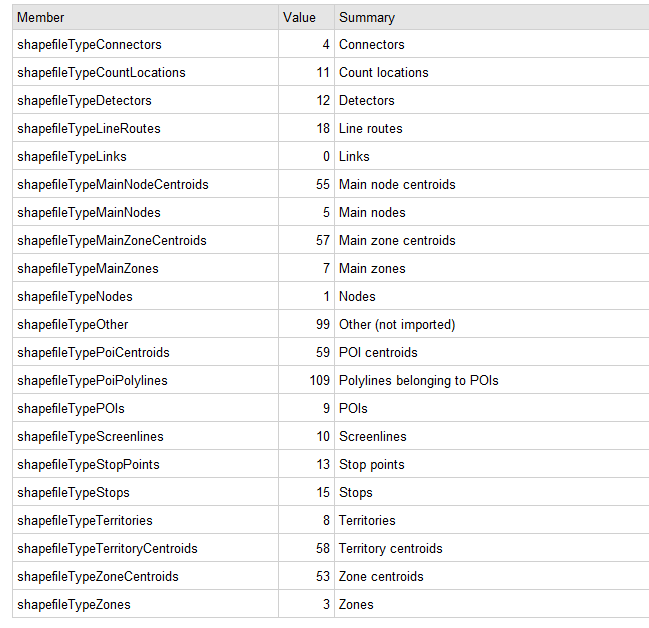

*search for* OBJECTTYPE *in COM help manual*

Visum has many public methods/properties like `AttValue()` - to get the attribute value, `SetAttValue()` - to set the attribute value and `ItemByKey()` - to get the item of a list by its key. These methods can be used everywhere with every object in Visum.

In [4]:
#parameters to import shapefile for nodes
parameters_nodes = Visum.IO.CreateImportShapeFilePara() #creating an instance of parameters

#setting the attributes
parameters_nodes.SetAttValue("READADDITIVE", "FALSE")  #since this is the first shapefile it should be read additively
parameters_nodes.SetAttValue("OBJECTTYPE", 1)  #objective type for nodes is 1

As mentioned above `ImportShapefile(FileName, ImportShapefileParameter)` method can be used to import the shapefile

In [5]:
#importing shapefile for nodes
Visum.IO.ImportShapefile("C:/Users/pamidiashoka/Desktop/visum/data/shapefiles/nodes.shp", parameters_nodes)

In [6]:
#beginners can ignore this
#this functions sets the graphic parameters
def Graphics():
    
    #modifying graphic parameters of nodes
    node_graphic = Visum.Net.GraphicParameters.Nodes.Display.Active.Uniform.Symbol
    node_graphic.SetAttValue("SIZE", 3)
    node_graphic.PolygonStyle.FillStyle.SetAttValue("COLOR", 'ff000000')  #first 2 characters indicate the transparancy 
    node_graphic.PolygonStyle.BorderStyle.SetAttValue("COLOR", 'ffffd700')  #last six indicate the hexa code of a colour
    
    #link for transparencey codes - https://gist.github.com/lopspower/03fb1cc0ac9f32ef38f4

    #modifying graphic parameters of zones
    Visum.Net.GraphicParameters.DesireLinesZones.SetAttValue("DRAW", 'FALSE')
    zone_graphic = Visum.Net.GraphicParameters.Zones.Display.Active.Uniform
    zone_graphic.PolygonStyle.FillStyle.SetAttValue("HATCHTYPE", 5)
    zone_graphic.PolygonStyle.FillStyle.SetAttValue("COLOR", 'ff95f75c')
    zone_graphic.SetAttValue("POINTOBJECTTYPE", 1)
    zone_graphic.Symbol.SetAttValue("SIZE", 1.5)
    zone_graphic.Symbol.PolygonStyle.FillStyle.SetAttValue("COLOR", 'ffffd700')
    zone_graphic.Symbol.PolygonStyle.BorderStyle.SetAttValue("COLOR", 'ff000000')

    line_graphic = Visum.Net.GraphicParameters.Links.Display.Active.Uniform
    line_graphic.SetAttValue("LINEWIDTH", 1.2)
    line_graphic.SetAttValue("LINECOLOR", 'ff1e8449')

    connector_graphic = Visum.Net.GraphicParameters.Connectors.Display.Active.Uniform
    connector_graphic.SetAttValue("LINEWIDTH", 0.5)
    connector_graphic.SetAttValue("LINECOLOR", 'ffcd5c5c')

    Visum.Net.GraphicParameters.Turns.SetAttValue("DRAW", "FALSE")

    Visum.Net.LegendParameters.LegendGeneralParameters.SetAttValue("TITLETEXT", 'Legend')

Graphics()

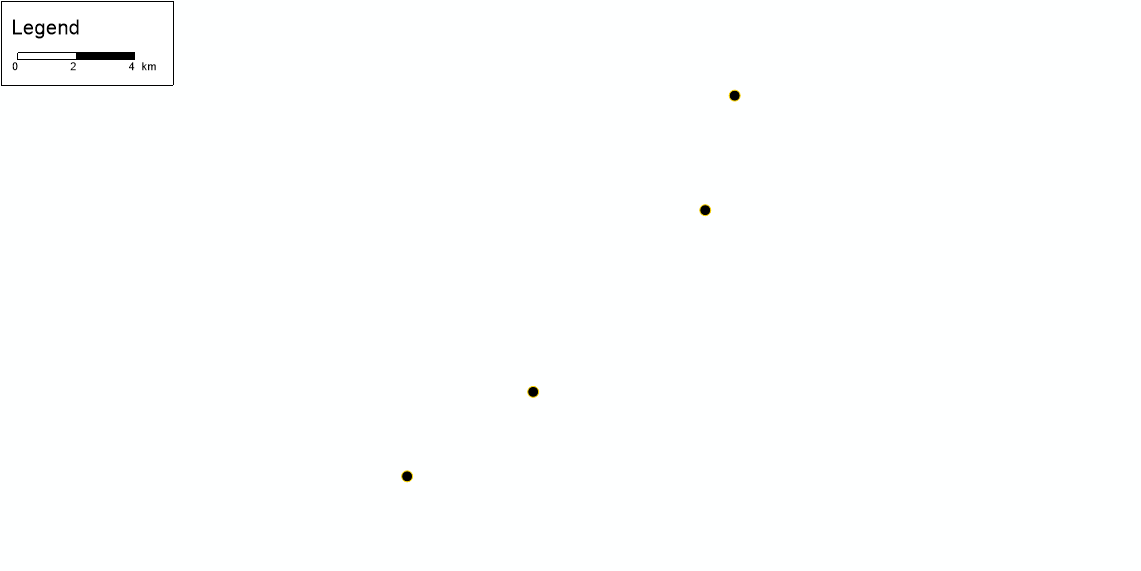

In [7]:
#to see whether the nodes were imported or not
printNetwork("net_1")

In [8]:
#parameters to import shapefile for zones
parameters_zones = Visum.IO.CreateImportShapeFilePara()  #creating an instance of parameters
parameters_zones.SetAttValue("READADDITIVE", "TRUE")  #read additive is true because nodes file was already imported
parameters_zones.SetAttValue("OBJECTTYPE", 3)  #objective type for zones is 3

In [9]:
#importing shapefile for zones
Visum.IO.ImportShapefile("C:/Users/pamidiashoka/Desktop/visum/data/shapefiles/zones.shp", parameters_zones)

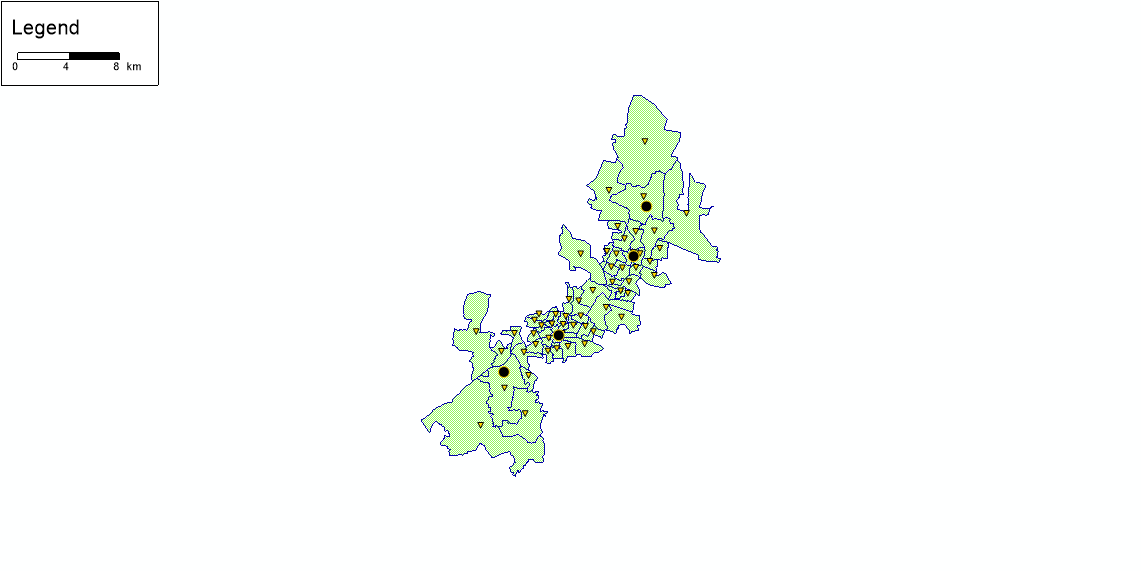

In [10]:
printNetwork("net_2")

After importing everything (links, zones) connectors can be created automatically by using `CreateODConnectors()` method of Net.  `Visum.Net.CreateODConnectors(PrTorPuT, MaxLength, MaxNumConnectorsPerZoneCreatedInThisStep, MaxNumConnectorsPerZoneTotal, TypeOfNewConnectors)`

#### <a id = "network2" style = "color:black">Creating network with Coordinates</a>

Instead of shapefiles, with coordinates also network can be created. `Net` of Visum contains everything related to network. `Net` has add methods for every object of the network. For example, to add a node `AddNode()` method can be used.

In [11]:
#to remove the network objects which were imported in previous section
Visum.Net.Zones.RemoveAll()
Visum.Net.Nodes.RemoveAll()

`AddNode(no , XCoord, YCoord)` takes the number, x-coordinate and y-coordinate as input arguments. This data can be arranged in a DataFrame so that with loops every node can be added to network in a single run.

`read_execl()` method of `pandas` can be used to read excel files.

In [12]:
#reading data of nodes
nodes = pd.read_excel("C:/Users/pamidiashoka/Desktop/visum/data/excel_files/network_data.xlsx", sheet_name = "nodes")
nodes.head()

,id,longitude,latitude
0,1,77.521900,12.932211
1,2,77.561389,12.958671
2,3,77.615312,13.015600
3,4,77.624533,13.051481


In [13]:
#adding nodes
for i in range(len(nodes)):
    Visum.Net.AddNode(no = nodes["id"][i], XCoord=nodes["longitude"][i], YCoord=nodes["latitude"][i])

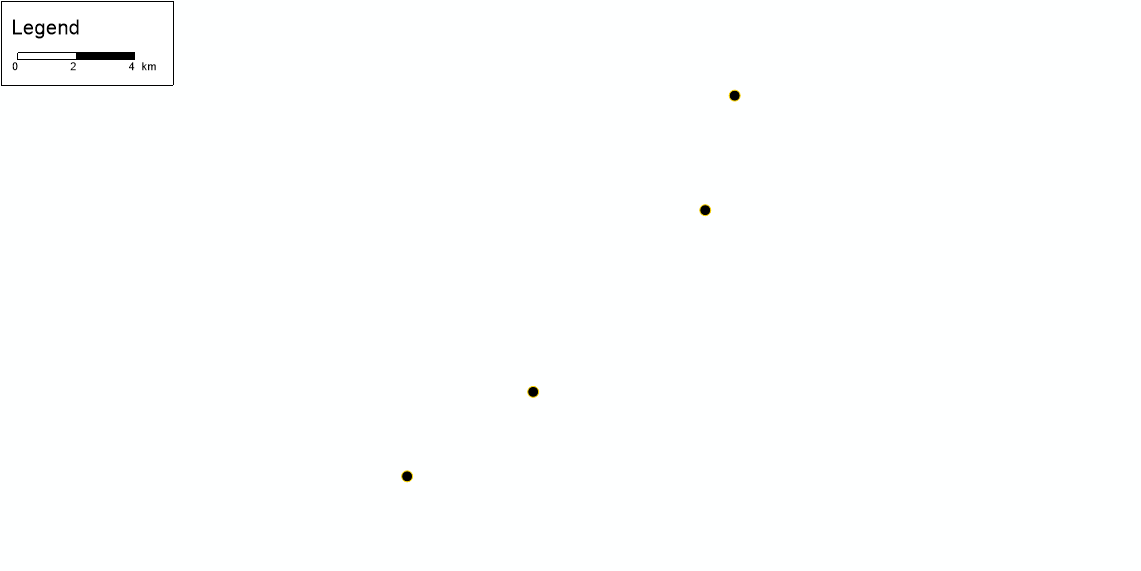

In [14]:
printNetwork("net_3")

After adding the nodes, `AddLink(no, fromNode, toNode, LinkType)` method can be used to add links between the nodes. It takes the number, origin node, destination node and type code as input arguments

In [15]:
fromNodes = [1,2,3]
toNodes = [2,3,4]

#adding links
for i in range(len(fromNodes)):
    Visum.Net.AddLink(no = i+1, fromNode = fromNodes[i], toNode = toNodes[i], LinkType = 1)

#a new like type can be created with AddLinkType() method

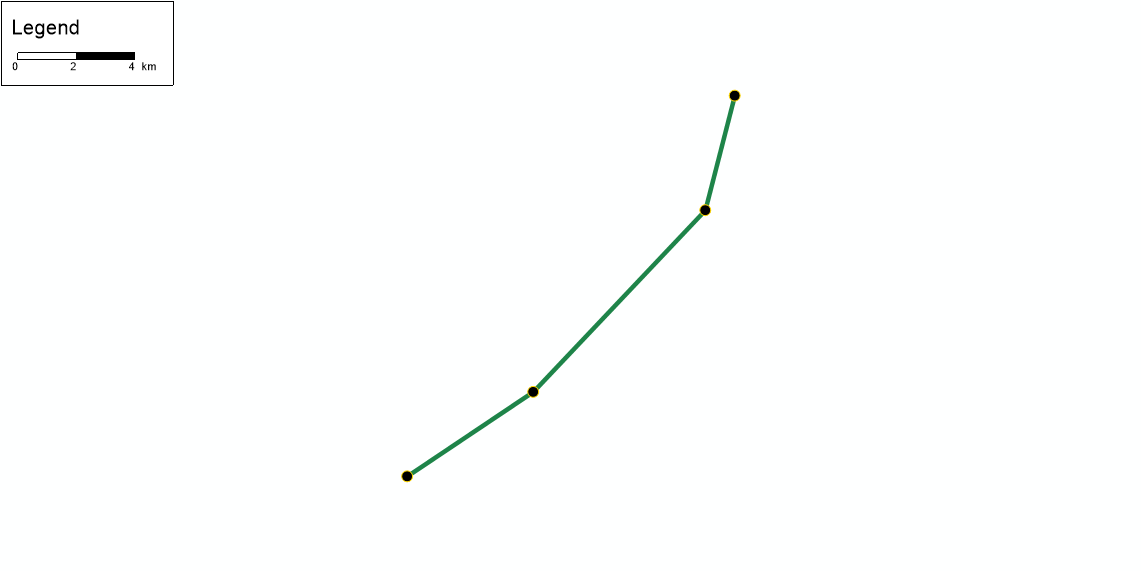

In [16]:
printNetwork("net_4")

`AddZone(no , XCoord, YCoord)` method also takes number, x-coordinate and y-coordinate as input arguments.

In [17]:
#reading data for zones
zones = pd.read_excel("C:/Users/pamidiashoka/Desktop/visum/data/excel_files/network_data.xlsx", sheet_name = "zones")
zones.head(5)

,zone_num,longitude,latitude,to_node
0,1,77.501788,12.959306,1
1,2,77.519961,12.945141,1
2,3,77.529309,12.958112,1
3,4,77.536233,12.944540,1
4,5,77.522141,12.918757,1


In [18]:
#adding zones
for i in range(len(zones)):
    Visum.Net.AddZone(no = zones["zone_num"][i], XCoord=zones["longitude"][i], YCoord=zones["latitude"][i])

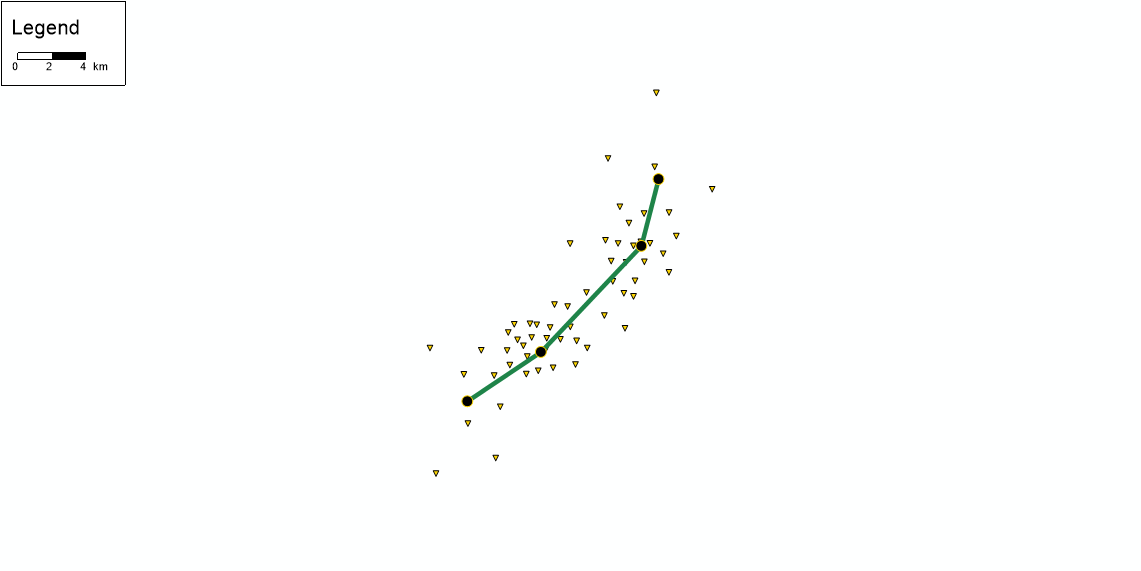

In [19]:
printNetwork("net_5")

`AddConnector(Zone, Node)` method takes the zone number and the node number.

In [20]:
#adding connectors
for i in range(len(zones)):
    Visum.Net.AddConnector(zones["zone_num"][i], zones["to_node"][i])

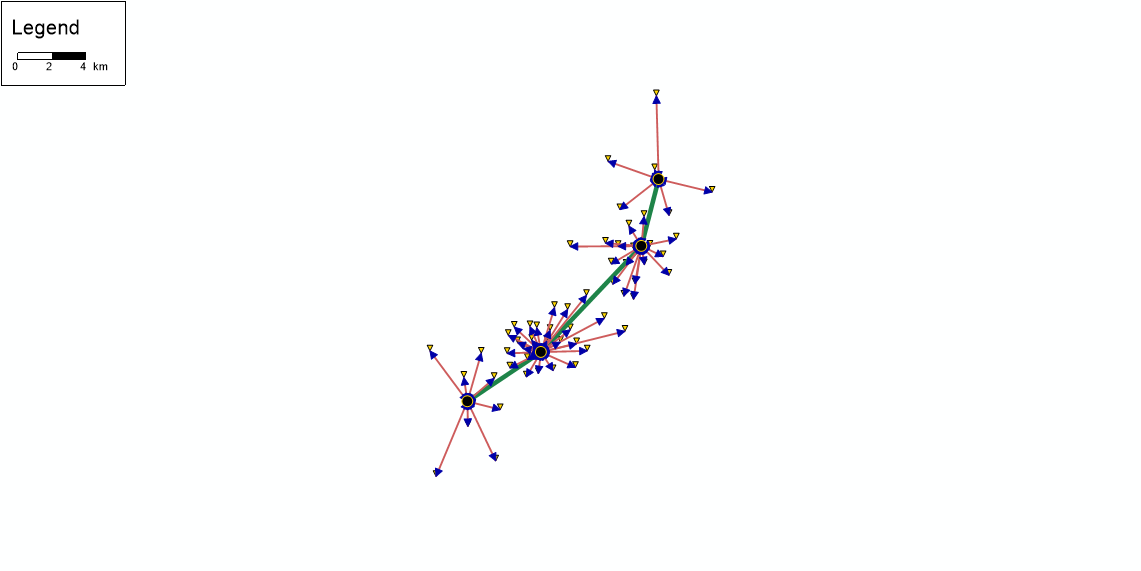

In [21]:
printNetwork("net_6")

#### <a id = "data" style = "color:black">Uploading Data</a>
Data like demand matrices can be automatically updated. `GetValues()` method can be used to get values from a matrix and `SetValues()` method to set values to a matrix. An existing matrix can be accessed by its key with `ItemByKey()` method. Or else, a new matrix can be created by using `AddMatrix(no, objectTypeRef, MatrixType)`. AddMatrix() method takes number, objcte type and matrx type as input arguments. Object type indicates the type of matrix to be created (with respect to zones or main zones, etc.) and matrix type indicates whether the matrix is a skim matrix or demand matrix as shown below.

objectTypeRef codes:
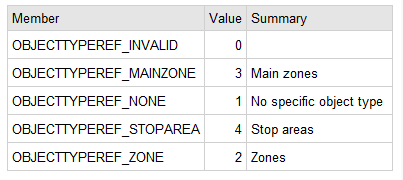

MatrixType codes
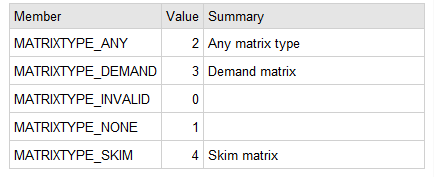

In [22]:
#creating a new matrix
taxi_demand = Visum.Net.AddMatrix(1, objectTypeRef=2, MatrixType=3)

Visum reads matrix as a tuple of tuples.

In [23]:
k = taxi_demand.GetValues()[1] #to get the first row of the matrix
print(k)

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


In [24]:
#reading demand data from excel file
taxi_demand_df = pd.read_excel("C:/Users/pamidiashoka/Desktop/visum/data/excel_files/taxi_demand_matrix.xlsx")
taxi_demand_df.head(5)

,od,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,0,552,150,276,241,977,113,819,142,...,461,771,591,163,918,335,287,848,129,621
1,2,919,0,146,679,799,181,902,169,858,...,620,964,524,230,766,149,353,994,131,557
2,3,895,886,0,502,826,777,846,585,703,...,979,305,670,794,120,331,110,730,255,423
3,4,255,711,514,0,312,193,800,884,238,...,850,485,675,943,293,785,931,356,308,927
4,5,584,567,191,113,0,694,133,534,104,...,534,619,714,906,845,815,521,109,181,980


Since Visum reads the data as tuple of tuples, the matrix to be passed to `SetValues()` method should be in the same format. The following function takes a DataFrame and returns it as tuple of tuples.

In [25]:
def DataFrameToTupleOfTuples(df):
    df_seq = []
    for i in range(len(df)):
        x = tuple(df.loc[i][1:])
        df_seq.append(x)
    return tuple(df_seq)
#numpy arrays also can be used to do it more effectively

In [26]:
converted_matrix = DataFrameToTupleOfTuples(taxi_demand_df)
taxi_demand.SetValues(converted_matrix)

`SetValuesToResultOfFormula()` method can be used to set values of a matrix as a result of formula. 
Let's say, car demand is 10% more than taxi demand and total private transport demand is sum of these two demands. These two matrices can be created as shown belown.

In [27]:
#creating new matrices for car and total demands
car_demand = Visum.Net.AddMatrix(2, objectTypeRef=2, MatrixType=3)
total_prt_demand = Visum.Net.AddMatrix(3, objectTypeRef=2, MatrixType=3)

#car demand = (taxi demand)*1.1
car_demand.SetValuesToResultOfFormula("Matrix([NO] = 1)*1.1") #make sure to pass the formula as a string

#total PrT demand = car_demand + taxi_demand
total_prt_demand.SetValuesToResultOfFormula("Matrix([NO] = 1)+Matrix([NO] = 1)")

True

After creating the required matrix it should be assigned to the corresponding demand segment. This can be done by setting `DSEGCODE` attribute to the particular segment by using `SetAttValue()` method.

A new demand segment can be created with these methods - `AddTSystem(Code, TSysClass)`, `AddMode(Code, TSysOrSet)` and `AddDemandSegment(Code, Mode)`.

In [28]:
Visum.Net.AddTSystem(Code = "new_sys", TSysClass = "PRT") #pass PUT instead of PRT to created a public transport system 
Visum.Net.AddMode(Code = "new_mode", TSysOrSet = "new_sys")
Visum.Net.AddDemandSegment(Code = "new_seg", Mode = "new_mode")

#setting total_prt_demand matrix to the new demand segment
total_prt_demand.SetAttValue("DSEGCODE", "new_seg")

#i suggest you to be a little more creative than me and provide proper names to demand segements to avoid confusion

The new transport system should be permitted on links, connectors and at truns. This can be done by looping through each element and setting that attribute to required transport system. Or else, `SetAllAttValues()` method can be used to set a single attribute to a value for all objects at once.

In [29]:
#setting new transport system to links, connectors and turns
Visum.Net.Links.SetAllAttValues(Attribut = "TSysSet", newValue = "new_sys", OnlyActive=True, Add=False)
Visum.Net.Connectors.SetAllAttValues(Attribut = "TSysSet", newValue = "new_sys", OnlyActive=True, Add=False)
Visum.Net.Turns.SetAllAttValues(Attribut = "TSysSet", newValue = "new_sys", OnlyActive=True, Add=False)

#### <a id = "procedures" style = "color:black">Creating and Executing Procedures</a> 
`Procedures` object of Visum has the all the methods related to procedure sequence. `AddOperation()` method which is a part of `Operations` class can be used to create a new procedure. `OPERATIONTYPE` attribute should be targeted to select a particular procedure like PrtAssignemnt or Mode Choice model, etc. Each procedure has a code as shown below.

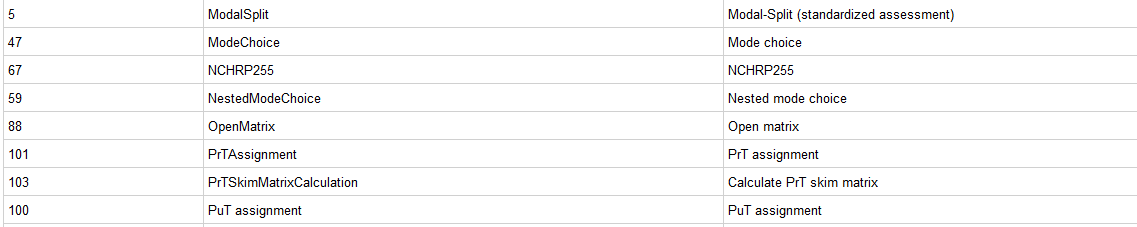

*full list is available in COM help manual*

In [30]:
procedure1 = Visum.Procedures.Operations.AddOperation(1) #it takes only serial number
procedure1.SetAttValue("OPERATIONTYPE", 101) #code for PrtAssignment is 101

Once the type of procedure is fixed, then attributes can be modified with `SetAttValue()` method. Since the procedure is PrtAssignemnt, `PrTAssignmentParameters` can be targeted to set the required attributes. Visum has different variants of PrtAssignment and each variant has a code as shown below

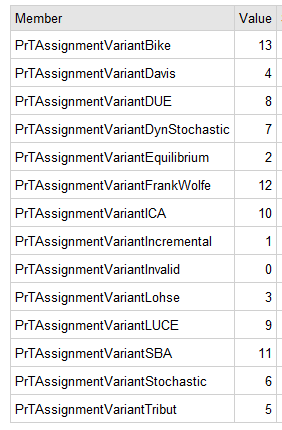

In [31]:
procedure1.PrTAssignmentParameters.SetAttValue("DSEGSET", "new_seg")  #choosing new demand segment
procedure1.PrTAssignmentParameters.SetAttValue("PRTASSIGNMENTVARIANT", 2)  #choosing variant of PrtDistribution
procedure1.SetAttValue("ACTIVE",1)  #to make sure that the procedure is active

`Execute()` methos can be used to execute procedures.

In [32]:
Visum.Procedures.Execute() #it will execute all the active procedures

Network after running PrtAssignment


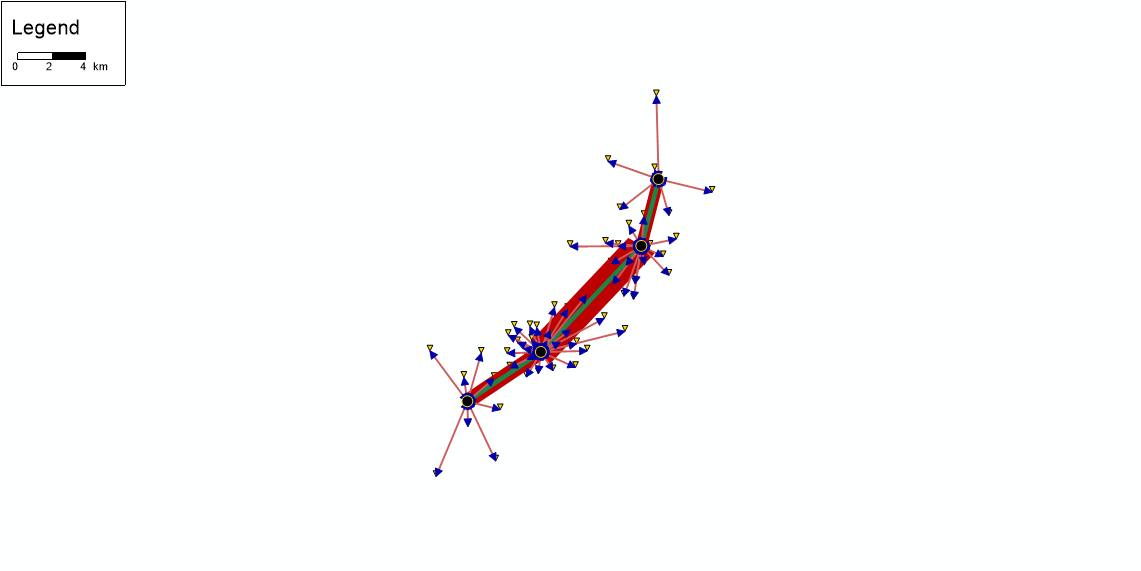

In [33]:
print("Network after running PrtAssignment")
printNetwork("net_7")

#### <a id = 'miscellaneous' style = "color:black">Miscellaneous</a>

- Almost every object in Visum can be accessed as a single entity and can be modified. `ItmeByKey()` method is a public property in Visum which means it can be used with every object.

In [34]:
#to change TSysSet of a link
l = Visum.Net.Links.ItemByKey(fromNode = 2, toNode = 3)
l.SetAttValue("TSYSSET", "C")
print(l.AttValue("TSYSSET"))
l.SetAttValue("TSYSSET", "new_sys")
print(l.AttValue("TSYSSET"))

C
new_sys


- To export multiple attributes of all items of a single network object type `GetMultipleAttributes()` method can be used. It takes the list of attributes and returns the values of those attributes for all the objects.

In [35]:
#to export links values as a DataFrame
all_links = Visum.Net.Links.GetMultipleAttributes(AttrIDs = ["FROMNODENO", "TONODENO", "TSYSSET", "LENGTH", "VOLVEHPRT(AP)"],
                                          OnlyActive=False)
print("Default structure of data in Visum\n")
print(all_links)


#with pandas 'all_links' can be converted to a DataFrame which can be easily written to excel
links_df = pd.DataFrame(all_links, columns = ["from_node", "to_node", "transport_system", "length", "link_vol_prt"])
print("\nSame data in the form of a df\n")
print(links_df)

Default structure of data in Visum

((1.0, 2.0, 'new_sys', 5.189373045633067, 431606.0), (2.0, 1.0, 'new_sys', 5.189373045633067, 442042.0), (2.0, 3.0, 'new_sys', 8.59585183078744, 852996.0), (3.0, 2.0, 'new_sys', 8.59585183078744, 881478.0), (3.0, 4.0, 'new_sys', 4.093643469505906, 329116.0), (4.0, 3.0, 'new_sys', 4.093643469505906, 337804.0))

Same data in the form of a df

   from_node  to_node transport_system    length  link_vol_prt
0        1.0      2.0          new_sys  5.189373      431606.0
1        2.0      1.0          new_sys  5.189373      442042.0
2        2.0      3.0          new_sys  8.595852      852996.0
3        3.0      2.0          new_sys  8.595852      881478.0
4        3.0      4.0          new_sys  4.093643      329116.0
5        4.0      3.0          new_sys  4.093643      337804.0


In [36]:
#extracting data from Visum and writing it to excel
#a function to extract matrix from Visum and convert it to a DataFrame
def getMatrixasDataFrame(matrixNumber):
    matrix = Visum.Net.Matrices.ItemByKey(matrixNumber)
    matrixValues = matrix.GetValues()
    noOfRows = int(matrix.AttValue("NUMROWS"))
    columnNames  = range(1, noOfRows+1)
    code = matrix.AttValue("CODE")
    matrixDataFrame = pd.DataFrame(matrixValues, columns = columnNames)
    matrixDataFrame.insert(0, "zone_code", columnNames)
    matrixDataFrame.set_index("zone_code")
    
    return matrixDataFrame

mat2_df = getMatrixasDataFrame(3)
mat2_df.to_excel("C:/Users/pamidiashoka/Desktop/visum/data/excel_files/total_prt_demand.xlsx")
mat2_df.head(5)

,zone_code,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,0.0,1104.0,300.0,552.0,482.0,1954.0,226.0,1638.0,284.0,...,922.0,1542.0,1182.0,326.0,1836.0,670.0,574.0,1696.0,258.0,1242.0
1,2,1838.0,0.0,292.0,1358.0,1598.0,362.0,1804.0,338.0,1716.0,...,1240.0,1928.0,1048.0,460.0,1532.0,298.0,706.0,1988.0,262.0,1114.0
2,3,1790.0,1772.0,0.0,1004.0,1652.0,1554.0,1692.0,1170.0,1406.0,...,1958.0,610.0,1340.0,1588.0,240.0,662.0,220.0,1460.0,510.0,846.0
3,4,510.0,1422.0,1028.0,0.0,624.0,386.0,1600.0,1768.0,476.0,...,1700.0,970.0,1350.0,1886.0,586.0,1570.0,1862.0,712.0,616.0,1854.0
4,5,1168.0,1134.0,382.0,226.0,0.0,1388.0,266.0,1068.0,208.0,...,1068.0,1238.0,1428.0,1812.0,1690.0,1630.0,1042.0,218.0,362.0,1960.0


- To avoid unnecessary conflicts it is good practice to assign every variable to `None` after its usage. Same approach was presented in the examples provided by Visum.

At the end, this instance of Visum can be saved as version file using `SaveVersion()` method. 

In [37]:
path = "C:/Users/pamidiashoka/Desktop/visum/visum_example.ver"
Visum.SaveVersion(VersionFile = path)

All the above modifications can be done in an existing version file also. `LoadVersion()` method of Visum can be used to load an existing file. It takes the path of the file along with .ver extension.

I hope you learned something new in this tutorial. Happy Coding!!

Please feel free to reach out to me on [Linkeding](https://www.linkedin.com/in/pamidiashok/) for any queries or suggestions.